<a href="https://colab.research.google.com/github/Vaibhav67979/MachineLearning/blob/br/TensorFlow/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x 
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 82s 52ms/step - loss: 1.5269 - accuracy: 0.4437 - val_loss: 1.2311 - val_accuracy: 0.5542
Epoch 2/10
1563/1563 [==============================] - 79s 50ms/step - loss: 1.1560 - accuracy: 0.5927 - val_loss: 1.0888 - val_accuracy: 0.6135
Epoch 3/10
1563/1563 [==============================] - 78s 50ms/step - loss: 1.0013 - accuracy: 0.6469 - val_loss: 1.0224 - val_accuracy: 0.6409
Epoch 4/10
1563/1563 [==============================] - 79s 50ms/step - loss: 0.9051 - accuracy: 0.6821 - val_loss: 0.9169 - val_accuracy: 0.6835
Epoch 5/10
1563/1563 [==============================] - 79s 50ms/step - loss: 0.8405 - accuracy: 0.7066 - val_loss: 0.9039 - val_accuracy: 0.6850
Epoch 6/10
1563/1563 [==============================] - 79s 50ms/step - loss: 0.7815 - accuracy: 0.7267 - val_loss: 0.9543 - val_accuracy: 0.6759
Epoch 7/10
1563/1563 [==============================] - 79s 50ms/step - loss: 0.7344 - accuracy: 0.7426 - val_loss: 0.8942 -

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 5s - loss: 0.8782 - accuracy: 0.7018 - 5s/epoch - 15ms/step
0.7017999887466431


313/313 [==============================] - 5s 16ms/step
ship


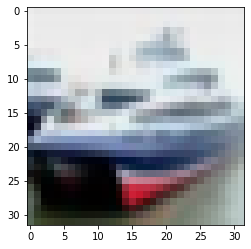

In [ ]:
predictions = model.predict(test_images)
print(class_names[np.argmax(predictions[1])])
plt.figure()
plt.imshow(test_images[1])
plt.grid(False)
plt.show()